# FCUC Data science classwork
# 0 Diabetes data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

diabetes = pd.read_csv("dataset/diabetes.csv")
#preview data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# check is null
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#preview description
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


base one those data information

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

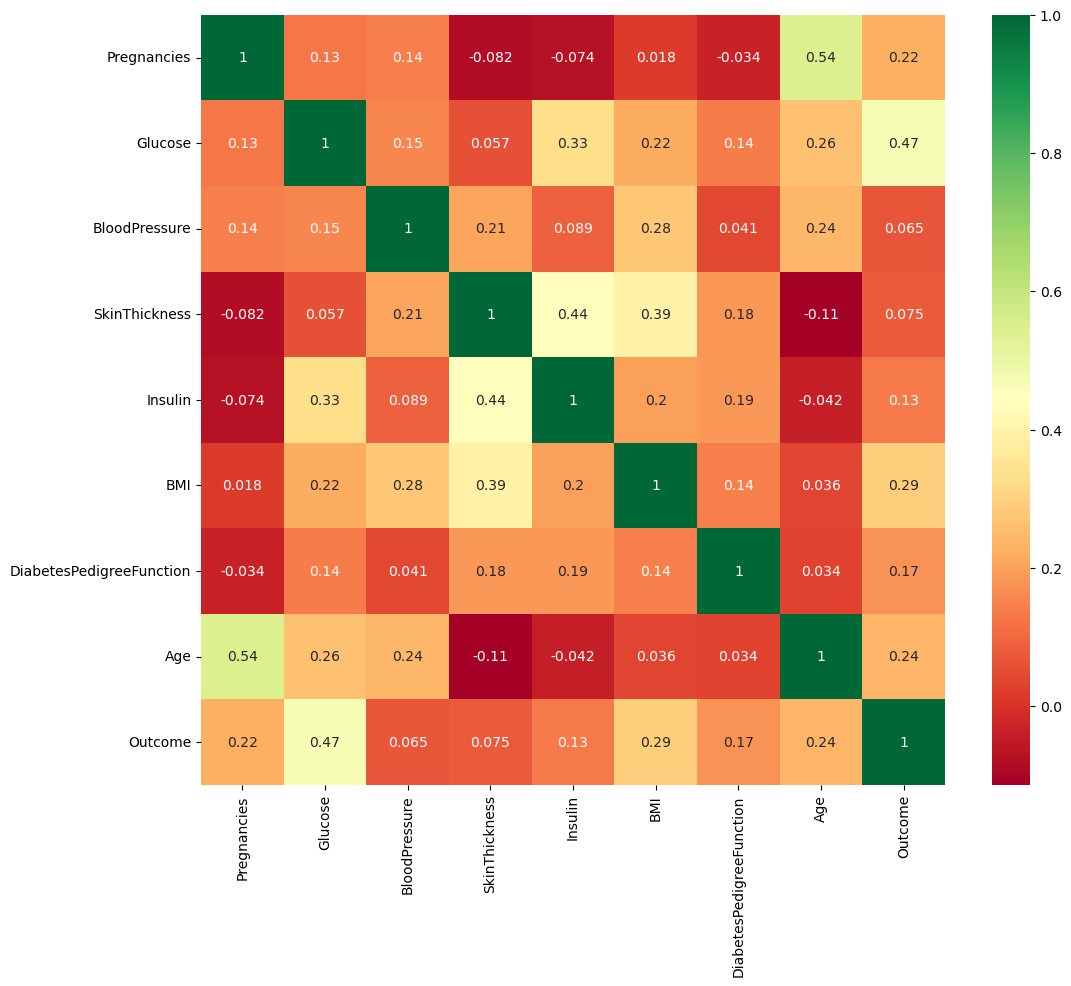

In [6]:
#  show Heatmap for unclean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# 1 Handling Missing Data

In [7]:
# get total number of rows
totalRows = len(diabetes)
print("Total number of rows : {0}".format(totalRows))

Total number of rows : 768


In [8]:
diabetes_data_copy = diabetes.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


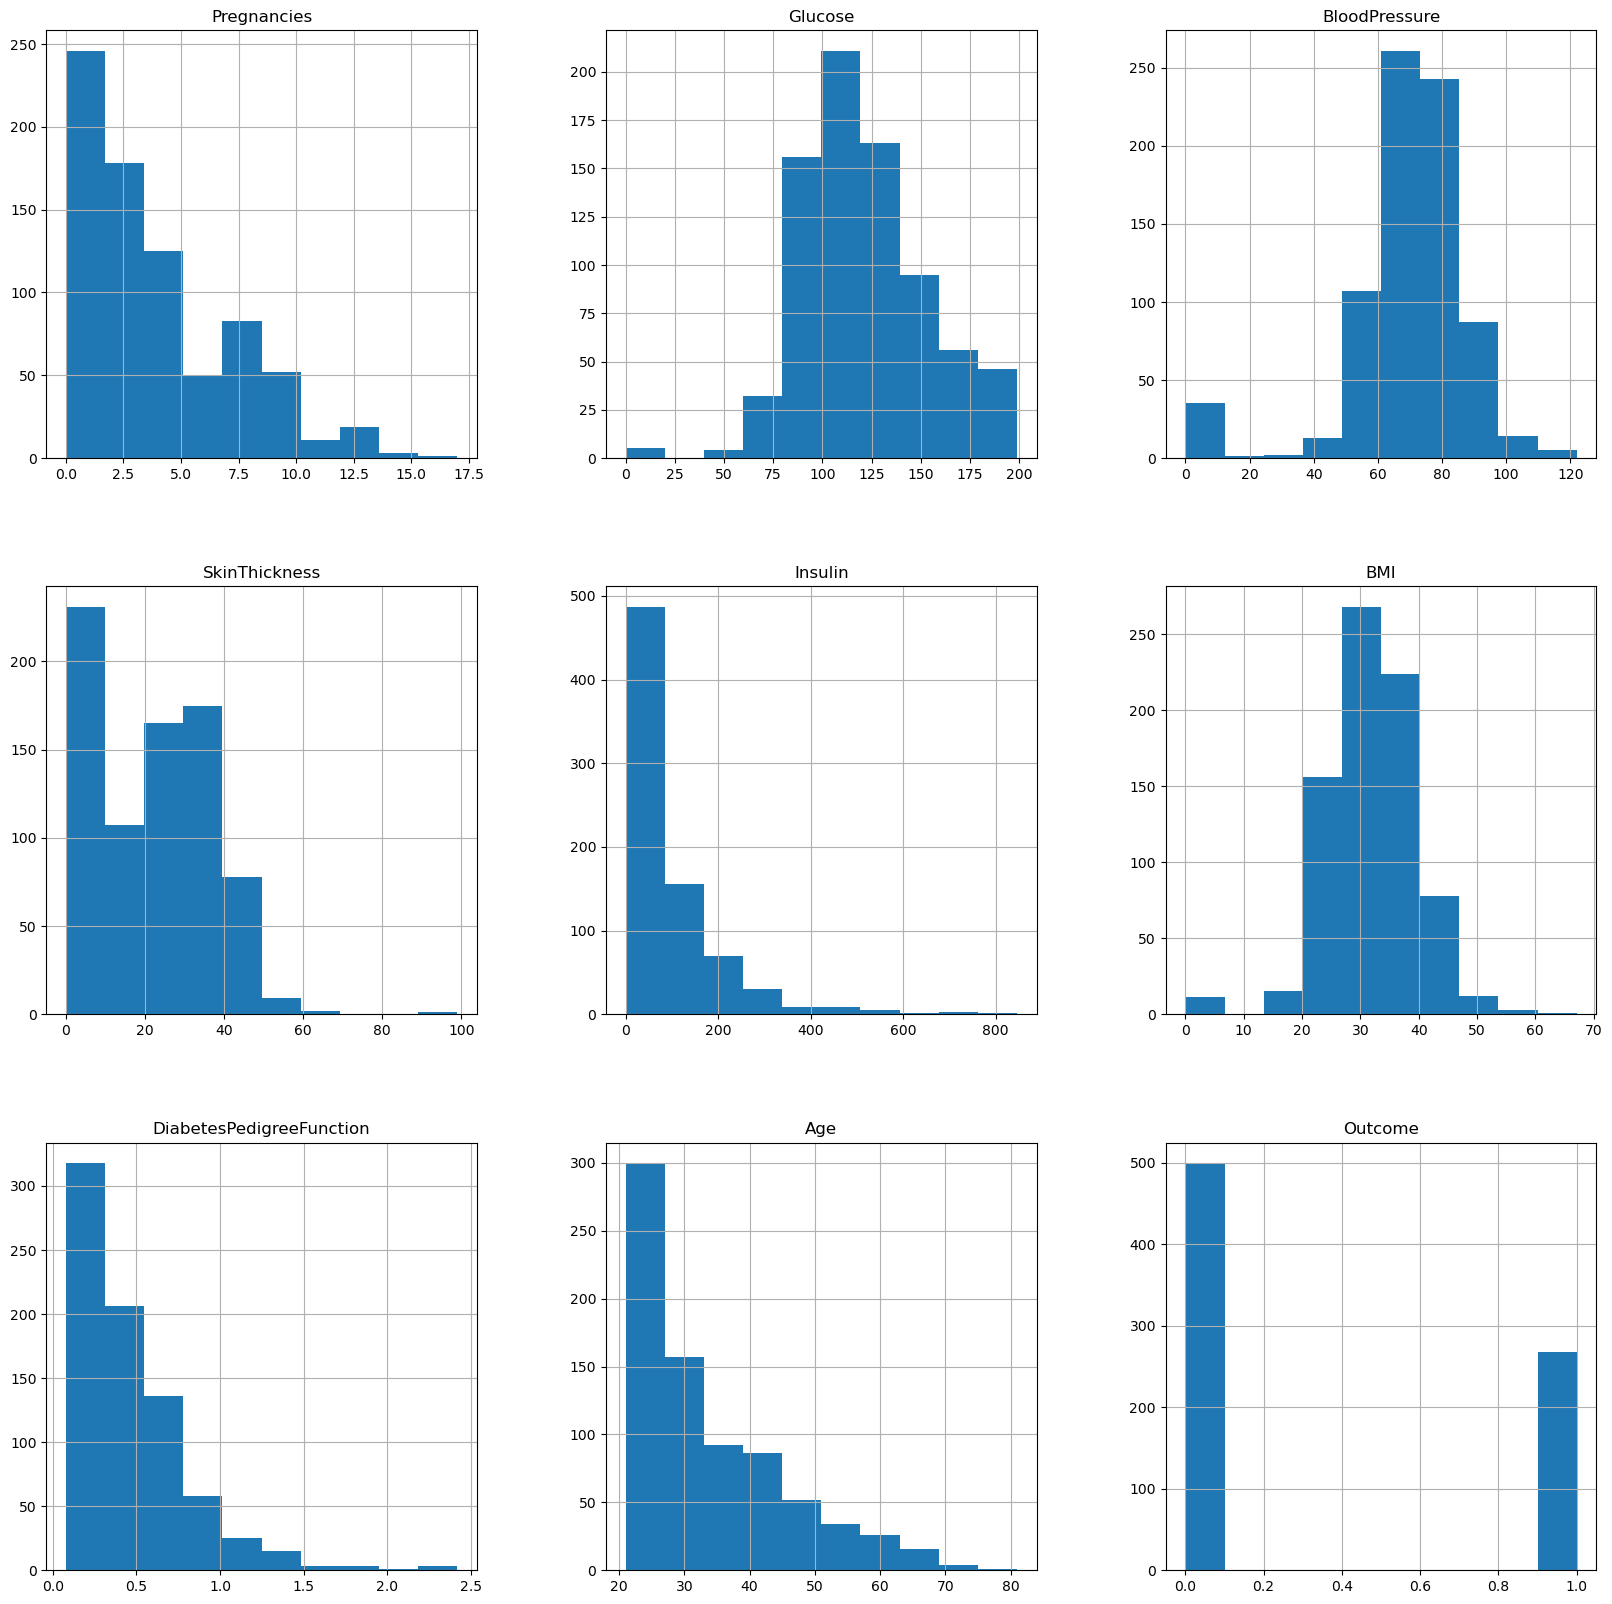

In [9]:
p = diabetes.hist(figsize = (20,20))

## 1.1 base one the data have two way , 1 is remove all the missing data and column
### 1.1.1 remove all the missing data and column .
since Insulin and SkinThickness 0 value nearly or over 30% then just remove those useless column

In [10]:
# remove column "Insulin" and "SkinThickness"
diabetes.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)

In [11]:
#preview description
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
# remove all the row which value is 0
diabetes = diabetes[(diabetes[['Glucose','BloodPressure','BMI']] != 0).all(axis=1)]

In [13]:
#preview description
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
print("Total number of rows : {0}".format(len(diabetes)))

Total number of rows : 724


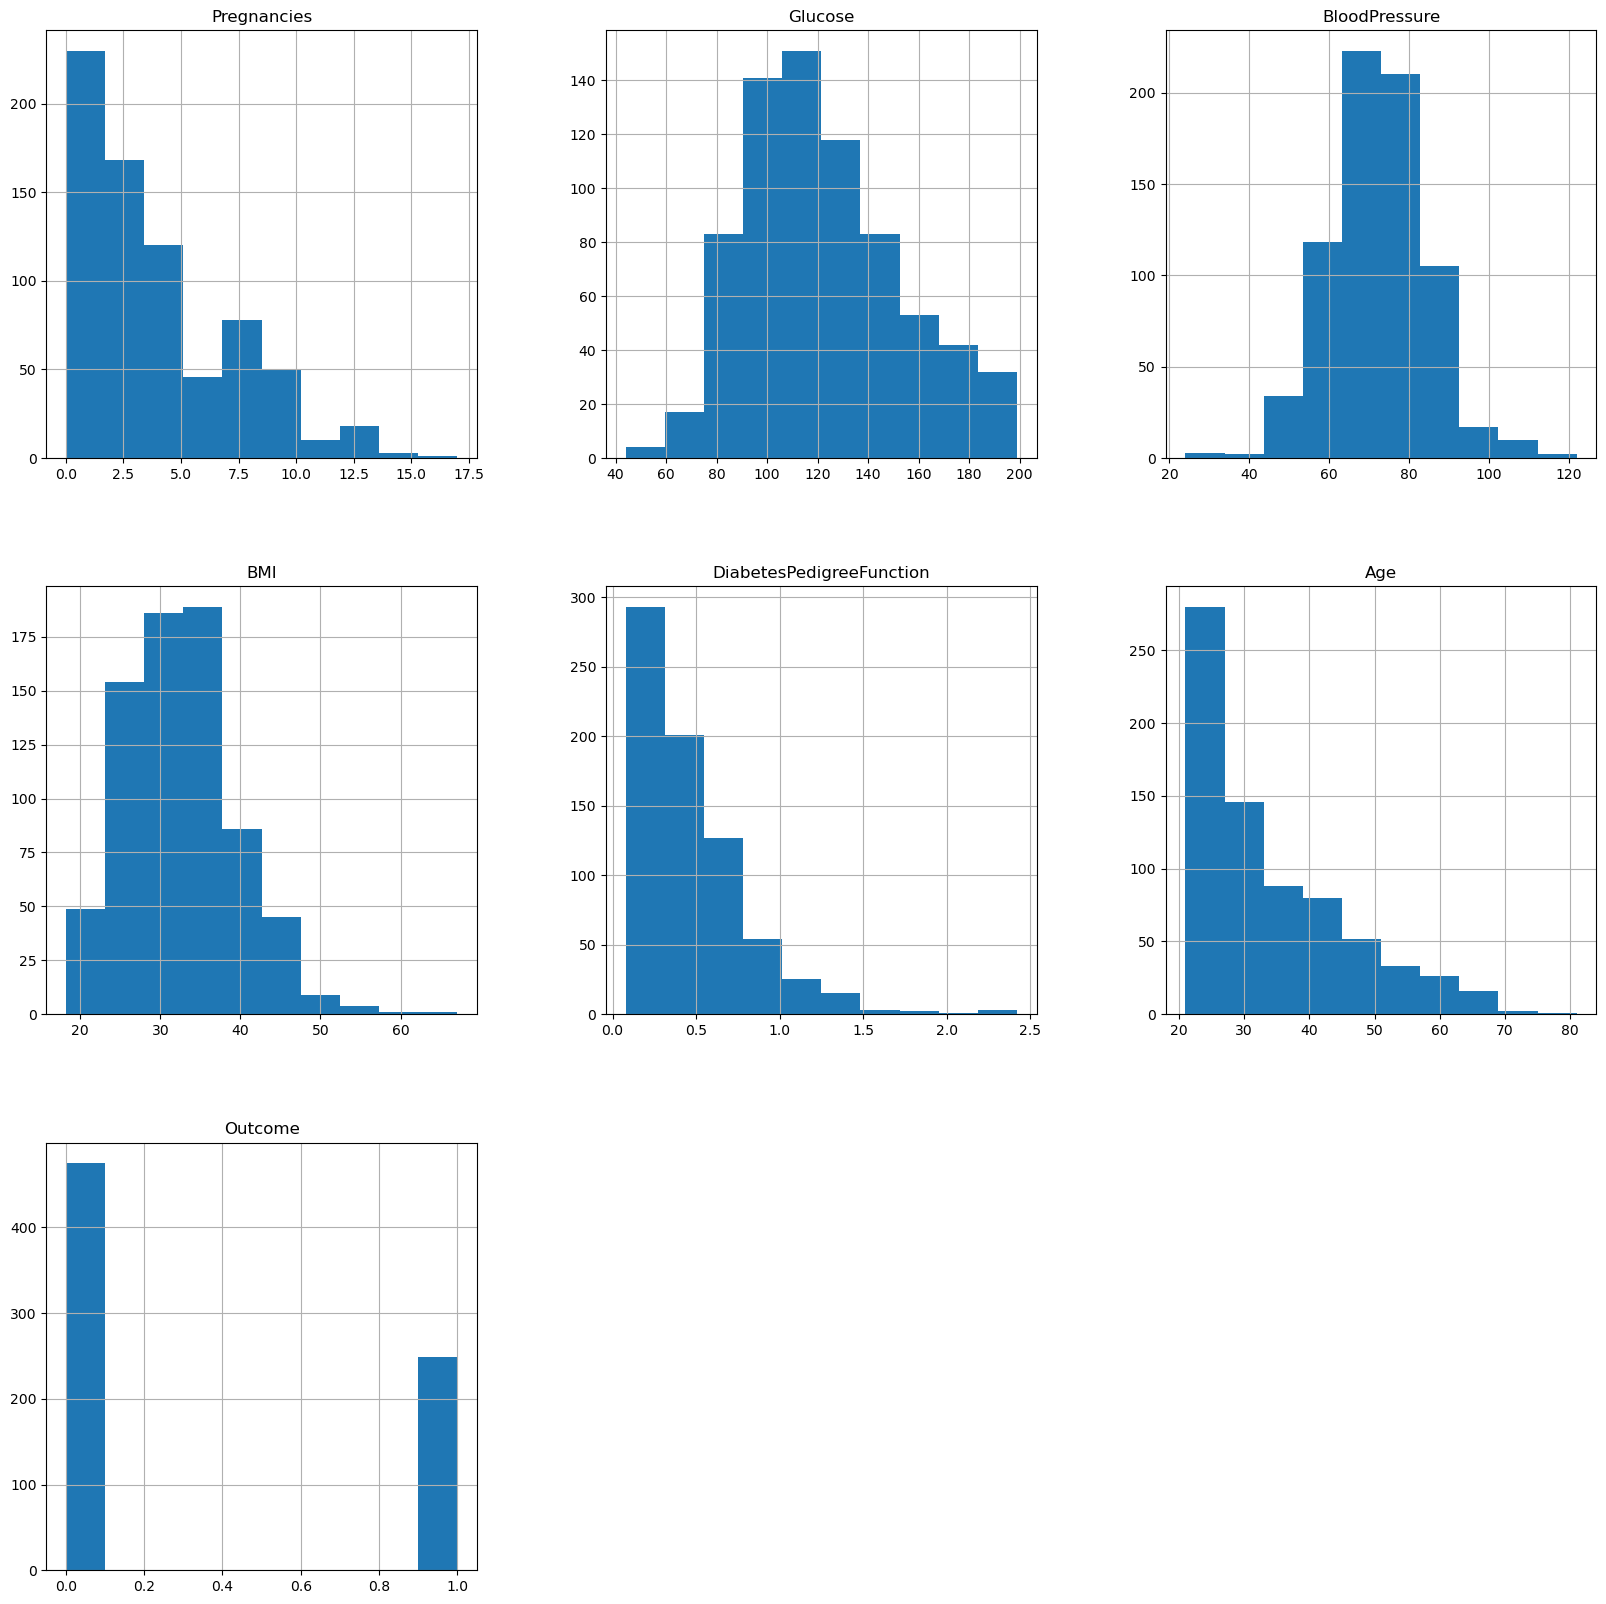

In [15]:
p = diabetes.hist(figsize = (20,20))

## 1.2 second way to fillna for data 

# 2 Handling Outliers

## 2.1 Pregnancies

Text(0.5, 1.0, 'Pregnancies Countplot')

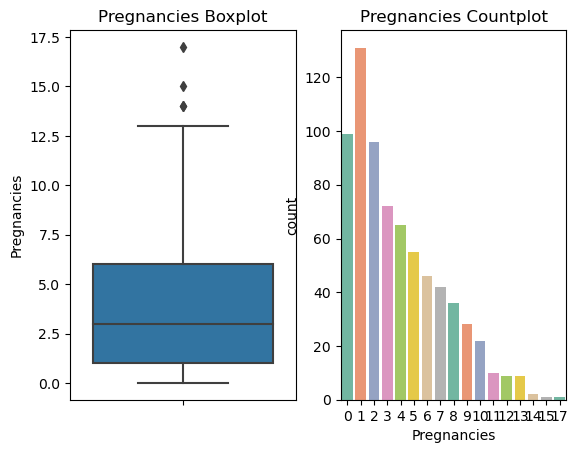

In [16]:
# Pregnancies
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=diabetes['Pregnancies'])
plt.title('Pregnancies Boxplot')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='Pregnancies', data=diabetes, palette='Set2')
plt.title('Pregnancies Countplot')

Total number of rows : 692


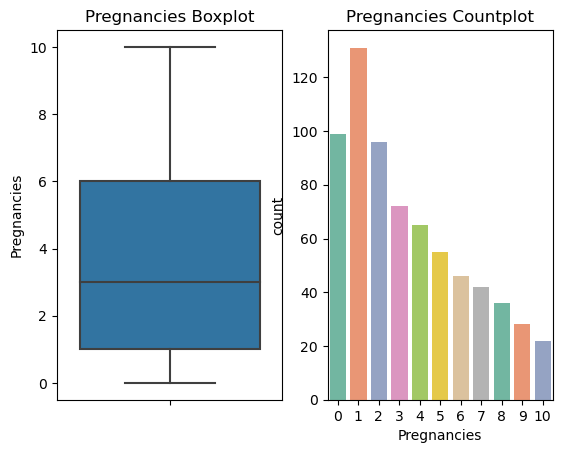

In [17]:
# clean data for pregnancies remove over than 13 
diabetes = diabetes[diabetes['Pregnancies'] <= 10]
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=diabetes['Pregnancies'])
plt.title('Pregnancies Boxplot')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='Pregnancies', data=diabetes, palette='Set2')
plt.title('Pregnancies Countplot')

print("Total number of rows : {0}".format(len(diabetes)))

## 2.2 Clucose

<Axes: xlabel='Glucose'>

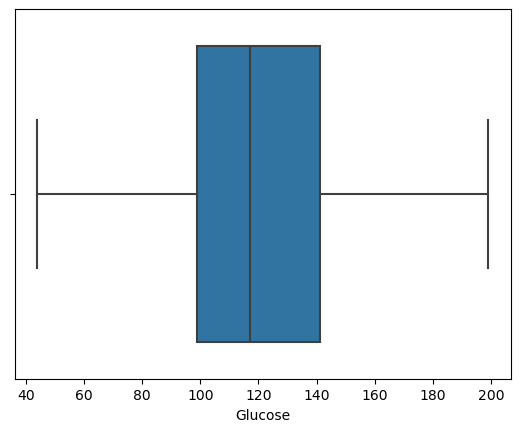

In [18]:
# check outliers
# Glucose
sns.boxplot(x=diabetes['Glucose'])

## 2.3 BloodPressure

<Axes: xlabel='BloodPressure'>

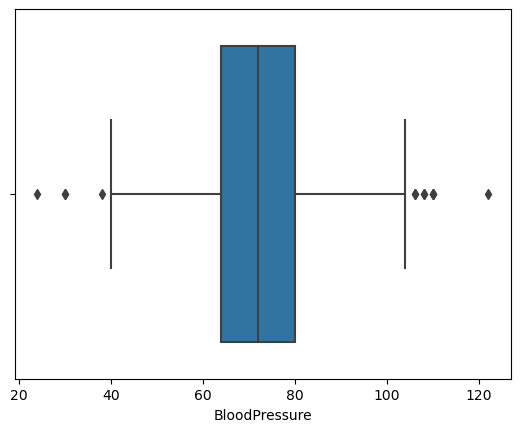

In [19]:
# BloodPressure
sns.boxplot(x=diabetes['BloodPressure'])

In [20]:
# get outliers number of BloodPressure
Q1 = diabetes['BloodPressure'].quantile(0.25)
Q3 = diabetes['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print("BloodPressure outliers number : {0}".format(len(diabetes[(diabetes['BloodPressure'] < (Q1 - 1.5 * IQR)) | (diabetes['BloodPressure'] > (Q3 + 1.5 * IQR))])))


BloodPressure outliers number : 12


## 2.4 BMI

<Axes: xlabel='BMI'>

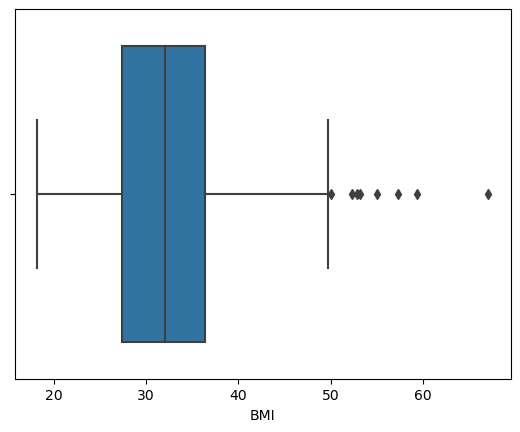

In [21]:
# BMI
sns.boxplot(x=diabetes['BMI'])

In [22]:
# get outliers number of BMI
Q1 = diabetes['BMI'].quantile(0.25)
Q3 = diabetes['BMI'].quantile(0.75)
IQR = Q3 - Q1
print("BMI outliers number : {0}".format(len(diabetes[(diabetes['BMI'] < (Q1 - 1.5 * IQR)) | (diabetes['BMI'] > (Q3 + 1.5 * IQR))])))


BMI outliers number : 8


In [23]:
# get quantile 0.75
diabetes['BMI'].quantile(0.75)

36.425

In [24]:
# remove BMI over than quantile 0.75
diabetes = diabetes[diabetes['BMI'] < 36.5]

<Axes: xlabel='Age'>

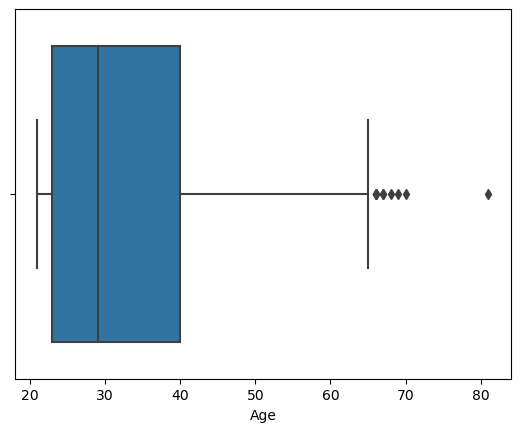

In [25]:
# age
sns.boxplot(x=diabetes['Age'])


In [26]:
# get outliers number of age
Q1 = diabetes['Age'].quantile(0.25)
Q3 = diabetes['Age'].quantile(0.75)
IQR = Q3 - Q1
print("Age outliers number : {0}".format(len(diabetes[(diabetes['Age'] < (Q1 - 1.5 * IQR)) | (diabetes['Age'] > (Q3 + 1.5 * IQR))])))


Age outliers number : 10


In [27]:
# get quantile 0.75
diabetes['Age'].quantile(0.75)

40.0

In [28]:
# remove age over than 41
diabetes = diabetes[diabetes['Age'] < 41]

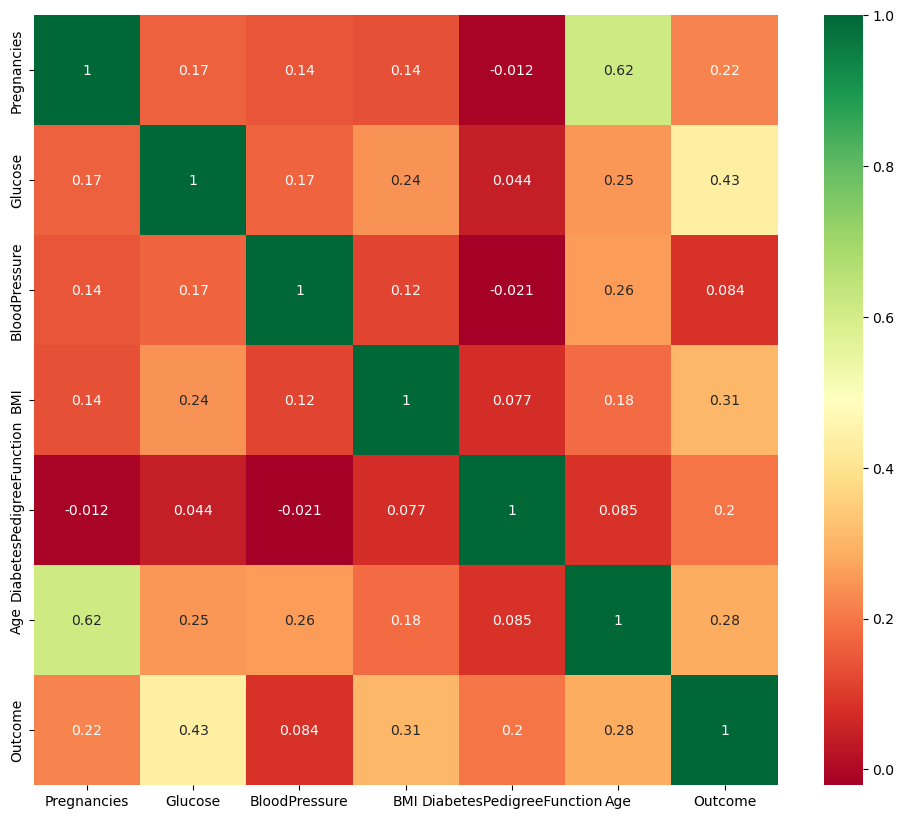

In [29]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

D:\anaconda\envs\data_science\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


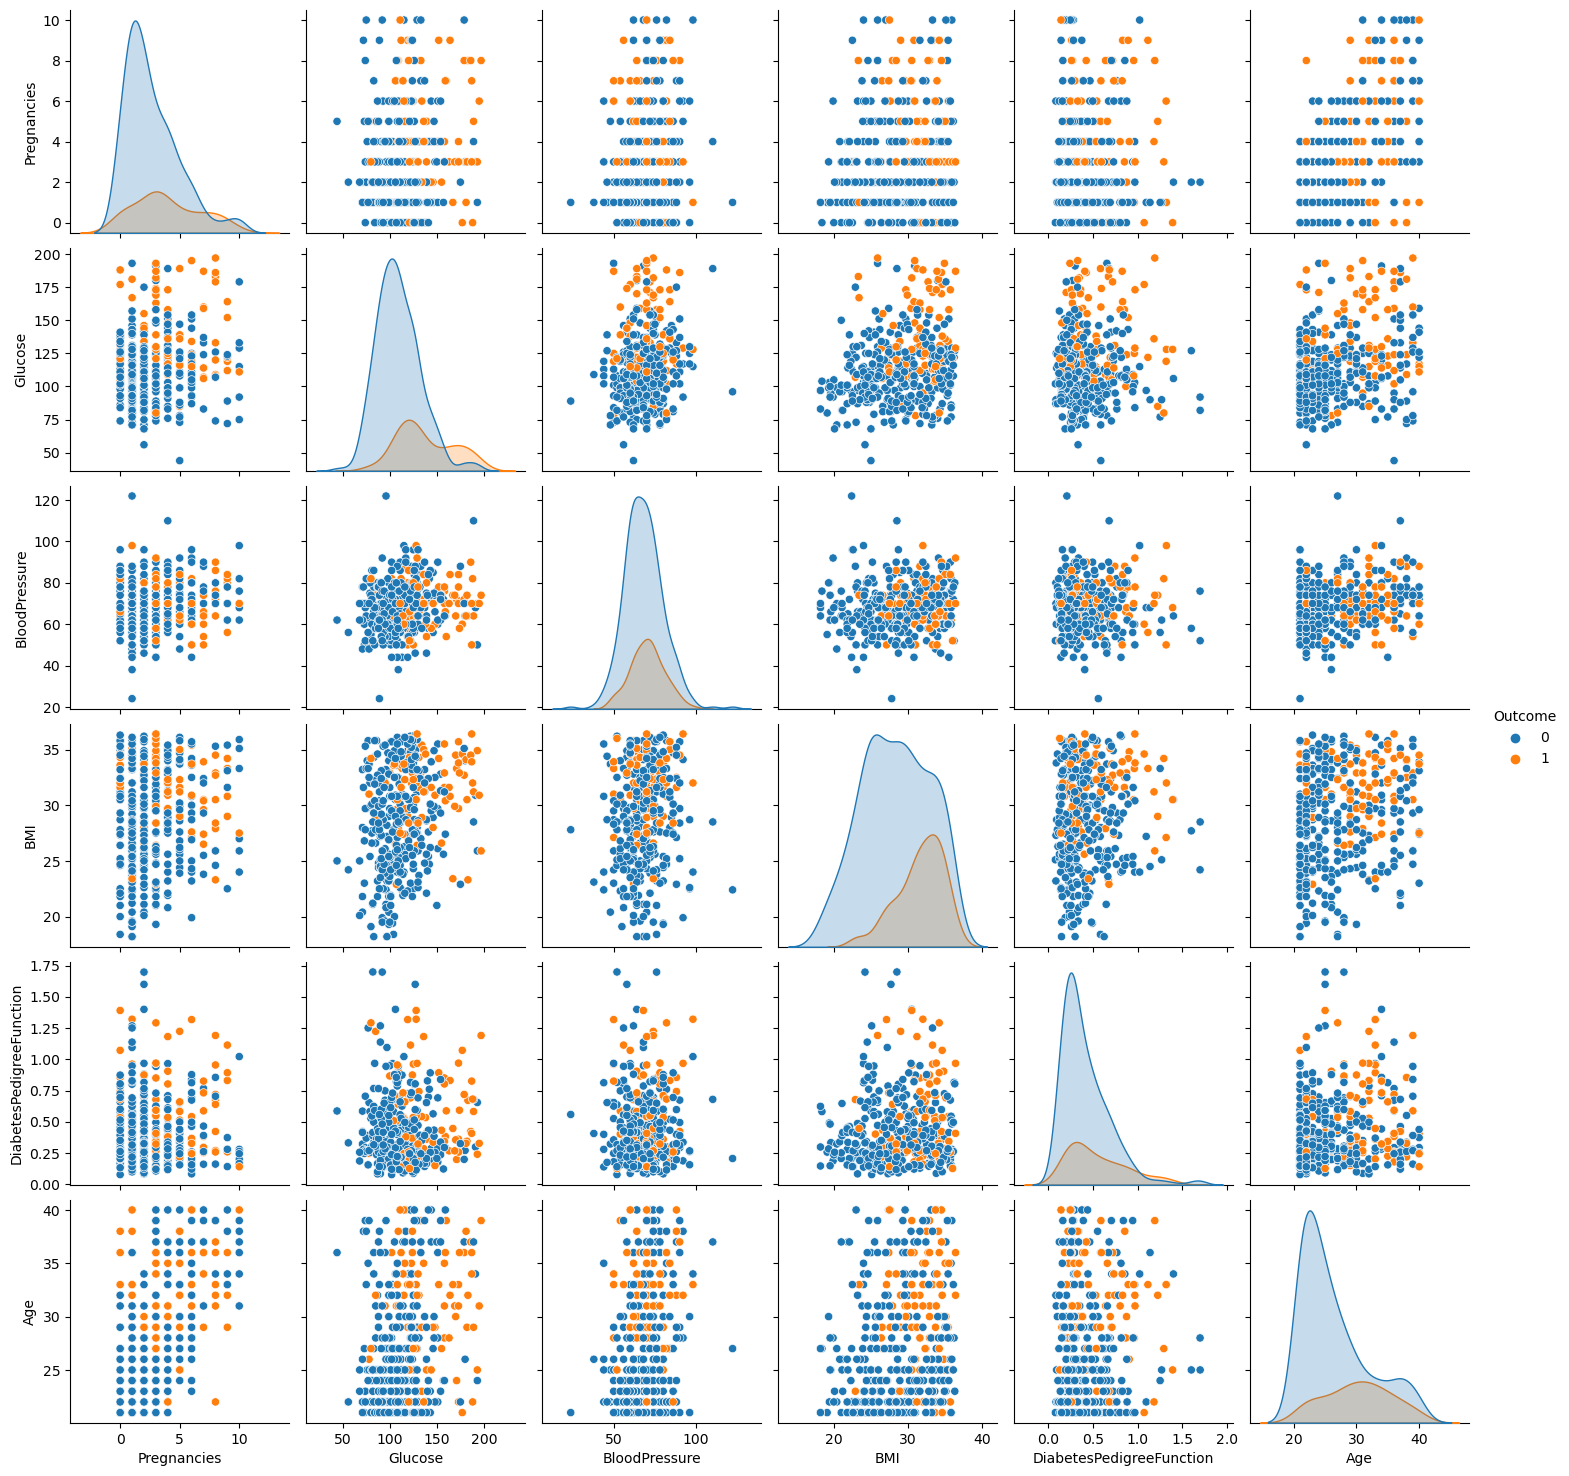

In [30]:
# Pair plot for clean data
p=sns.pairplot(diabetes, hue = 'Outcome')